In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# This part below is the web scraping part of the project. The problem is there was a request limit, so if you do the request too much the site will block you. However, I already have the wiz_stats file.

# Creating a list of dataframes
dfs = []


wiz_url = f'https://www.basketball-reference.com/teams/GSW/2023.html'

# The requests library can send a GET request to the wiz_url
wiz_res = requests.get(wiz_url)
# BeautifulSoup library parses the content of an HTML document, in this case wiz_res
wiz_soup = BeautifulSoup(wiz_res.content, 'lxml')

# BeautifulSoup's .find() method searches for a tag and specified attributes, 
# returning the first match 
wiz_per_game = wiz_soup.find(name = 'table', attrs = {'id' : 'per_game'})
# Creating a list of dictionaries to then convert into a Pandas Dataframe
wiz_stats = []


for row in wiz_per_game.find_all('tr')[1:]:  # Excluding the first 'tr', since that's the table's title head

    player = {}
    player['Player'] = row.find('a').text.strip()
    player['Age'] = row.find('td', {'data-stat' : 'age'}).text

    player['DWS'] = row.find('td', {'data-stat' : 'drb_per_g'}).text
    player['OWS'] = row.find('td', {'data-stat' : 'orb_per_g'}).text

    player['PTS'] = row.find('td', {'data-stat' : 'pts_per_g'}).text
    wiz_stats.append(player)

df = pd.DataFrame(wiz_stats)
dfs.append(df)
# Save to CSV
df.to_csv('csv_files/wiz_stats.csv', index=False)





***************

Age and PTS: slope = 0.3464810649946614 , intercept = 0.21594084372657107 , r_value = 0.22424369658194795 , p_value = 0.031641630332735884 , std_err = 0.1587210770174011
***************

***************

DWS and PTS: slope = 2.286992077203505 , intercept = 2.5255755633861723 , r_value = 0.5114479266104957 , p_value = 1.8881793906931623e-07 , std_err = 0.4050363567699402
***************

***************

OWS and PTS: slope = 0.5921941084811164 , intercept = 8.788613773546556 , r_value = 0.05085284691446358 , p_value = 0.6302279607020469 , std_err = 1.225928901652879
***************



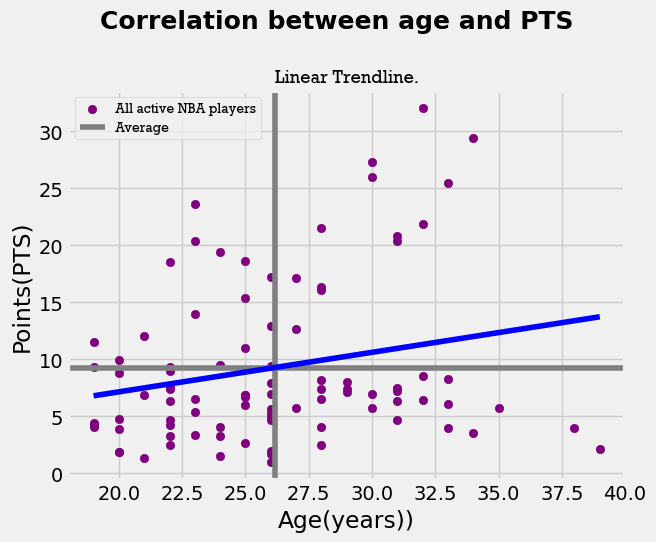

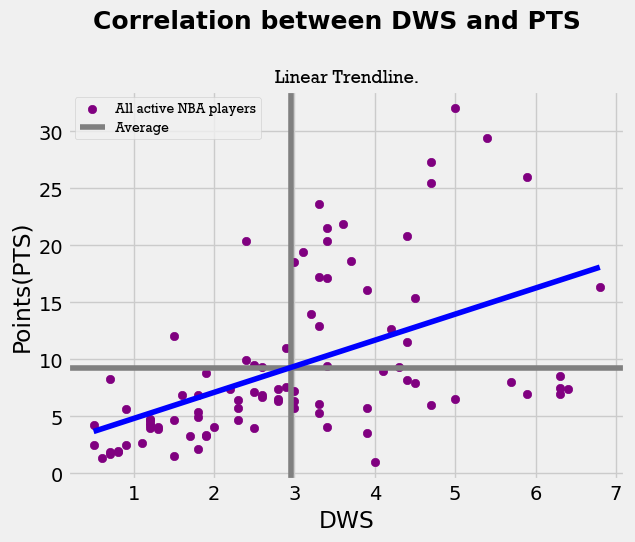

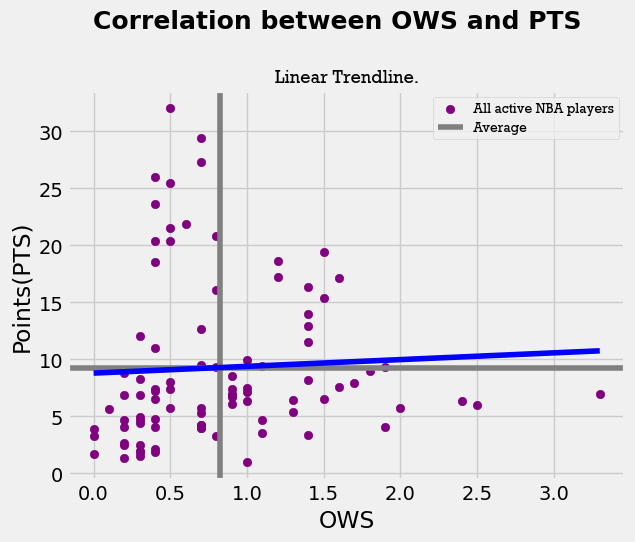

In [2]:
%matplotlib inline

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import csv
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

# Replace what is inside the quotes with wherever you placed the file
with open('csv_files/wiz_stats.csv') as csvfile:
    readCSVplayer = csv.reader(csvfile, delimiter = ',')
    next(readCSVplayer)
    player = []
    age = []
    DWS = []
    OWS = []
    PTS = []
 
    for row in readCSVplayer:
        currPlayer = row[0]
        currAge = row[1]
        currDWS = row[2]
        currOWS = row[3]
        currPTS=row[4]

        player.append(currPlayer)
        age.append(currAge)
        DWS.append(currDWS)
        OWS.append(currOWS)
        PTS.append(currPTS)
        
floatAge = [float(i) for i in age]
floatDWS = [float(i) for i in DWS]
floatOWS = [float(i) for i in OWS]
floatPTS = [float(i) for i in PTS]

plt.style.use('fivethirtyeight')
 
agePlotPTS, ax = plt.subplots()
DWSPlotPTS, ax2 = plt.subplots()
OWSPlotPTS, ax3 = plt.subplots()

#Ax is between age and PTS. 
ax.scatter(floatAge, floatPTS, label = "All active NBA players", color = 'purple')
ax.axvline(x = np.mean(floatAge), color = 'grey') #X-axis
ax.axhline(y = np.mean(floatPTS), label = "Average", color = 'grey') #Y-axis
agePlotPTS.suptitle("Correlation between age and PTS", weight = 'bold', size = 18, y = 1.05)
ax.set_title("Linear Trendline.", size = 12, fontname = 'Rockwell')
ax.set_xlabel("Age(years))")
ax.set_ylabel("Points(PTS)")

ax.plot(np.unique(floatAge), np.poly1d(np.polyfit(floatAge, floatPTS, 1))(np.unique(floatAge)), 'blue')
 
ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

print("***************\n")
slope, intercept, r_value, p_value, std_err = linregress(floatAge, floatPTS)
print("Age and PTS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 7))
print("***************\n")
 
# Ax2 is between DWS and PTS.
ax2.scatter(floatDWS, floatPTS, label = "All active NBA players", color = 'purple')
ax2.axvline(x = np.mean(floatDWS), color = 'grey')
ax2.axhline(y = np.mean(floatPTS), label = "Average", color = 'grey')
DWSPlotPTS.suptitle("Correlation between DWS and PTS", weight = 'bold', size = 18, y = 1.05)
ax2.set_title("Linear Trendline.", size = 12, fontname = 'Rockwell')
ax2.set_xlabel("DWS")
ax2.set_ylabel("Points(PTS)") 

ax2.plot(np.unique(floatDWS), np.poly1d(np.polyfit(floatDWS, floatPTS, 1))(np.unique(floatDWS)), 'blue')
 
ax2.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})
print("***************\n")
slope, intercept, r_value, p_value, std_err = linregress(floatDWS, floatPTS)
print("DWS and PTS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
print("***************\n")

# Ax2 is between OWS and PTS.
ax3.scatter(floatOWS, floatPTS, label = "All active NBA players", color = 'purple')
ax3.axvline(x = np.mean(floatOWS), color = 'grey')
ax3.axhline(y = np.mean(floatPTS), label = "Average", color = 'grey')
OWSPlotPTS.suptitle("Correlation between OWS and PTS", weight = 'bold', size = 18, y = 1.05)
ax3.set_title("Linear Trendline.", size = 12, fontname = 'Rockwell')
ax3.set_xlabel("OWS")
ax3.set_ylabel("Points(PTS)") 

ax3.plot(np.unique(floatOWS), np.poly1d(np.polyfit(floatOWS, floatPTS, 1))(np.unique(floatOWS)), 'blue')
 
ax3.legend(loc='best', prop={'size': 9, 'family': 'Rockwell'})
print("***************\n")
slope, intercept, r_value, p_value, std_err = linregress(floatOWS, floatPTS)
print("OWS and PTS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3))
print("***************\n")
 

# Remove if you do not want to save the figures in your working directory
# Change the DPI to adjust image size
agePlotPTS.savefig('Photos/age-PTS-linear.png', dpi = 400, bbox_inches = 'tight')
DWSPlotPTS.savefig('Photos/DWS-PTS-linear.png', dpi = 400, bbox_inches = 'tight')
OWSPlotPTS.savefig('Photos/OWS-PTS-linear.png', dpi = 400, bbox_inches = 'tight')